<a href="https://colab.research.google.com/github/Mayurrathod1/Stock_Market_Forcasting/blob/main/Arima_and_comparison_of_Arima_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install pmdarima

In [48]:
#import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta, timezone
from time import time
from pmdarima.arima import auto_arima

In [49]:
# Define the ticker symbol and the start and end dates
tickerSymbol = "Reliance.NS"
end_date = yf.download(tickerSymbol).index[-1] #today
start_date = end_date - pd.DateOffset(years=10)

# Download the data using yfinance
data = yf.download(tickerSymbol, start=start_date, end=end_date)

data['Date'] = data.index
data['Close'] = data['Adj Close']
data.dropna(inplace=True)

# Display the close prices
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Date
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,
Date,,,,,,,
2014-12-10,194.158722,194.158722,215.085342,212.582352,212.913803,13242754,2014-12-10
2014-12-11,188.662231,188.662231,212.353775,206.490616,212.353775,22620658,2014-12-11
2014-12-12,183.707016,183.707016,208.239273,201.004623,207.324936,17874849,2014-12-12
2014-12-15,182.967896,182.967896,201.564651,199.324524,200.684601,12647964,2014-12-15
2014-12-16,180.011429,180.011429,201.896088,196.512955,200.421738,20886278,2014-12-16
...,...,...,...,...,...,...,...
2024-12-02,1309.150024,1309.150024,1311.349976,1277.050049,1288.000000,11024152,2024-12-02
2024-12-03,1323.300049,1323.300049,1326.800049,1307.000000,1317.000000,16869482,2024-12-03


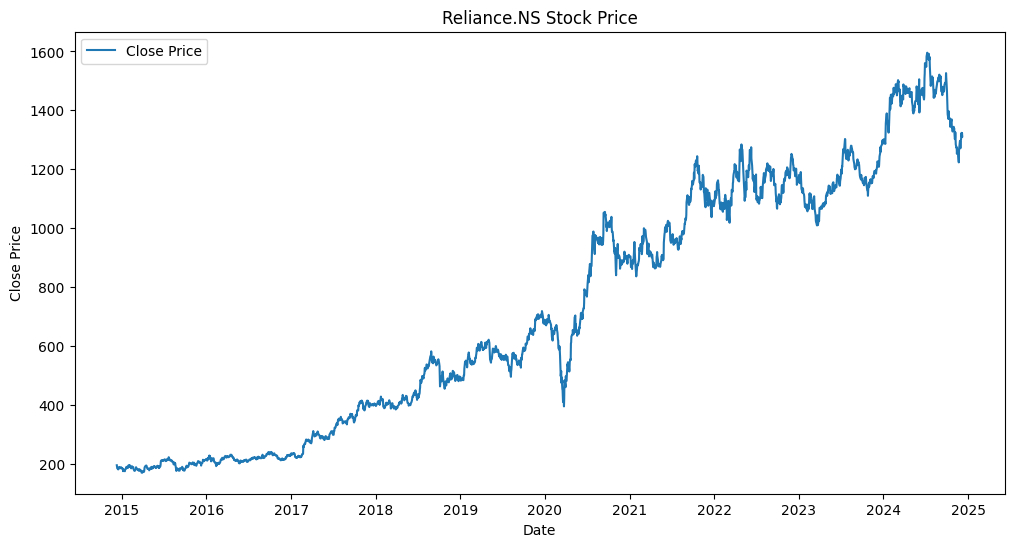

In [50]:
# Plot the stock data
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title(f'{tickerSymbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [77]:
# Splitting the data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data['Close'][:train_size]
test_data = data['Close'][train_size:]
print(train_data)
print(test_data)

Ticker      RELIANCE.NS
Date                   
2014-12-10   194.158722
2014-12-11   188.662231
2014-12-12   183.707016
2014-12-15   182.967896
2014-12-16   180.011429
...                 ...
2022-11-29  1243.055054
2022-11-30  1251.831909
2022-12-01  1248.142456
2022-12-02  1247.615234
2022-12-05  1229.419922

[1972 rows x 1 columns]
Ticker      RELIANCE.NS
Date                   
2022-12-06  1232.972046
2022-12-07  1214.776733
2022-12-08  1214.203857
2022-12-09  1195.802246
2022-12-12  1197.635498
...                 ...
2024-12-02  1309.150024
2024-12-03  1323.300049
2024-12-04  1308.949951
2024-12-05  1322.050049
2024-12-06  1311.550049

[494 rows x 1 columns]


In [52]:
# Fit an Auto-ARIMA model
warnings.filterwarnings('ignore')
auto_arima_model = auto_arima(train_data, seasonal=False, trace=True,
                              error_action='ignore', suppress_warnings=True,
                              stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15453.415, Time=4.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15463.941, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15465.168, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15465.201, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15465.580, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15467.262, Time=1.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15467.553, Time=1.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15455.639, Time=4.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15456.169, Time=7.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15467.013, Time=1.90 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15465.227, Time=2.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15465.538, Time=1.51 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=15459.082, Time=8.23 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=15454.928, Time=1.57 sec

Best model:  ARIMA

In [53]:
# Print summary of the model
print(auto_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1972
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -7720.708
Date:                Tue, 10 Dec 2024   AIC                          15453.415
Time:                        06:12:16   BIC                          15486.933
Sample:                             0   HQIC                         15465.731
                               - 1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9368      0.503      1.861      0.063      -0.050       1.924
ar.L1          0.1688      0.015     11.357      0.000       0.140       0.198
ar.L2         -0.9532      0.014    -68.492      0.0

In [54]:
import pytz
data_ = []
index_ = test_data.index.tolist()
index_.insert(0,pd. Timestamp('2022-12-05 00:00:00+0530', tz=pytz.FixedOffset(330)))

try:
  for i in range (1,len(index_)):
    model = ARIMA(train_data, order=(2,1,2), seasonal_order=(0,0,0,0))
    fitted = model.fit()
    next_day_price = fitted.forecast()
    predicted_price = next_day_price.values[0]

    # Convert the current date to a string
    current_date_str = index_[i-1].strftime('%Y-%m-%d')

    # Check if the current date is in the train_data index
    if current_date_str in train_data.index:
        # Access train_data using .loc with the current_date_str
        current_close_price = train_data.loc[current_date_str].iloc[0]

    train_data.loc[index_[i]] = test_data.loc[index_[i]]

    # Check if the current date is in the train_data index before comparison
    if current_date_str in train_data.index and predicted_price < current_close_price:
        direction = 'SELL'
    else:
        direction = 'BUY'

    data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'), 'Day': index_[i-1].strftime('%A'), 'Current Close Price': current_close_price, 'Next day Price': train_data.loc[index_[i].strftime('%Y-%m-%d')], 'Prediction Direction': direction, 'Predicted Value': predicted_price})  # Access 'Close' column

except KeyboardInterrupt or ValueError:
  print("DONE")

In [55]:
data_

[{'Date': '2022-12-05',
  'Day': 'Monday',
  'Current Close Price': 1229.419921875,
  'Next day Price': Ticker
  RELIANCE.NS    1232.972046
  Name: 2022-12-06 00:00:00, dtype: float64,
  'Prediction Direction': 'SELL',
  'Predicted Value': 1227.713584454172},
 {'Date': '2022-12-06',
  'Day': 'Tuesday',
  'Current Close Price': 1232.9720458984375,
  'Next day Price': Ticker
  RELIANCE.NS    1214.776733
  Name: 2022-12-07 00:00:00, dtype: float64,
  'Prediction Direction': 'BUY',
  'Predicted Value': 1234.337939874032},
 {'Date': '2022-12-07',
  'Day': 'Wednesday',
  'Current Close Price': 1214.7767333984375,
  'Next day Price': Ticker
  RELIANCE.NS    1214.203857
  Name: 2022-12-08 00:00:00, dtype: float64,
  'Prediction Direction': 'BUY',
  'Predicted Value': 1216.2083777097846},
 {'Date': '2022-12-08',
  'Day': 'Thursday',
  'Current Close Price': 1214.203857421875,
  'Next day Price': Ticker
  RELIANCE.NS    1195.802246
  Name: 2022-12-09 00:00:00, dtype: float64,
  'Prediction Direc

In [68]:
#plot the predicted vs original price data
_df = pd.DataFrame(data_) # Convert the list of dictionaries to a DataFrame
_df = _df.set_index('Date')  # Set 'Date' column as the index
_df.index = pd.to_datetime(_df.index, errors='coerce') # Parse index as datetime objects to handle errors

# prompt: find test data[0] and predicted values[0] date print both

print(_df.index[1], _df['Predicted Value'][0])
_df

2022-12-06 00:00:00 1227.713584454172


,Day,Current Close Price,Next day Price,Prediction Direction,Predicted Value
Date,,,,,
2022-12-05,Monday,1229.419922,Ticker RELIANCE.NS 1232.972046 Name: 2022-1...,SELL,1227.713584
2022-12-06,Tuesday,1232.972046,Ticker RELIANCE.NS 1214.776733 Name: 2022-1...,BUY,1234.337940
2022-12-07,Wednesday,1214.776733,Ticker RELIANCE.NS 1214.203857 Name: 2022-1...,BUY,1216.208378
2022-12-08,Thursday,1214.203857,Ticker RELIANCE.NS 1195.802246 Name: 2022-1...,SELL,1212.868802
2022-12-09,Friday,1195.802246,Ticker RELIANCE.NS 1197.635498 Name: 2022-1...,SELL,1193.805091
...,...,...,...,...,...
2024-11-29,Friday,1292.199951,Ticker RELIANCE.NS 1309.150024 Name: 2024-1...,SELL,1291.091518
2024-12-02,Monday,1309.150024,Ticker RELIANCE.NS 1323.300049 Name: 2024-1...,BUY,1310.782135
2024-12-03,Tuesday,1323.300049,Ticker RELIANCE.NS 1308.949951 Name: 2024-1...,SELL,1322.816002


In [74]:
# prompt: find 1st test data date print

test_data.index[0]
test_data

Ticker,RELIANCE.NS
Date,
2022-12-06,1232.972046
2022-12-07,1214.776733
2022-12-08,1214.203857
2022-12-09,1195.802246
2022-12-12,1197.635498
...,...
2024-12-02,1309.150024
2024-12-03,1323.300049
2024-12-04,1308.949951


In [70]:
# prompt: remove 1st row of _df and last row of test data

# Remove the first row of _df
_df = _df.iloc[1:]
_df

,Day,Current Close Price,Next day Price,Prediction Direction,Predicted Value
Date,,,,,
2022-12-06,Tuesday,1232.972046,Ticker RELIANCE.NS 1214.776733 Name: 2022-1...,BUY,1234.337940
2022-12-07,Wednesday,1214.776733,Ticker RELIANCE.NS 1214.203857 Name: 2022-1...,BUY,1216.208378
2022-12-08,Thursday,1214.203857,Ticker RELIANCE.NS 1195.802246 Name: 2022-1...,SELL,1212.868802
2022-12-09,Friday,1195.802246,Ticker RELIANCE.NS 1197.635498 Name: 2022-1...,SELL,1193.805091
2022-12-12,Monday,1197.635498,Ticker RELIANCE.NS 1203.0896 Name: 2022-12-...,BUY,1198.444209
...,...,...,...,...,...
2024-11-29,Friday,1292.199951,Ticker RELIANCE.NS 1309.150024 Name: 2024-1...,SELL,1291.091518
2024-12-02,Monday,1309.150024,Ticker RELIANCE.NS 1323.300049 Name: 2024-1...,BUY,1310.782135
2024-12-03,Tuesday,1323.300049,Ticker RELIANCE.NS 1308.949951 Name: 2024-1...,SELL,1322.816002


In [78]:
test_data = test_data.iloc[:-1]
test_data

Ticker,RELIANCE.NS
Date,
2022-12-06,1232.972046
2022-12-07,1214.776733
2022-12-08,1214.203857
2022-12-09,1195.802246
2022-12-12,1197.635498
...,...
2024-11-29,1292.199951
2024-12-02,1309.150024
2024-12-03,1323.300049


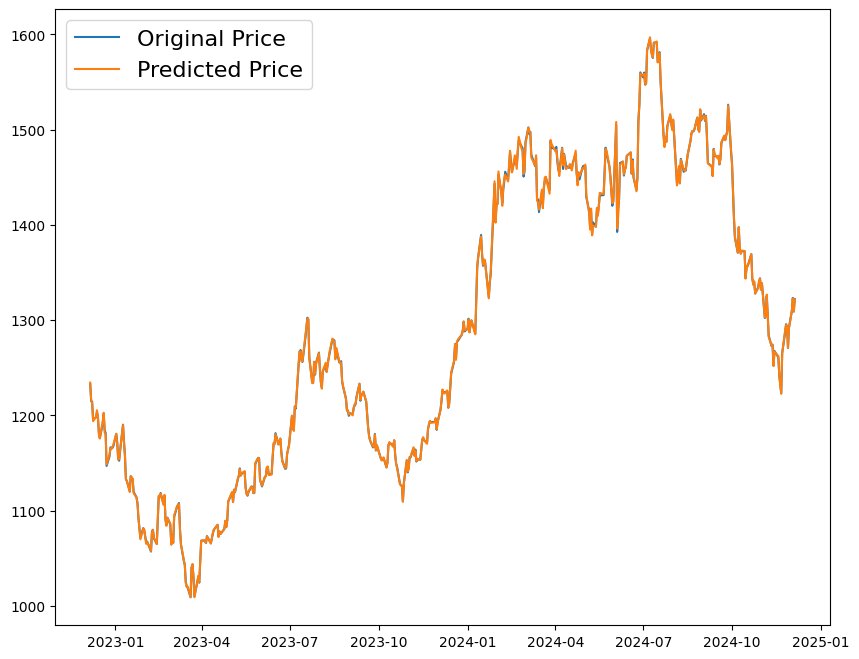

In [79]:
plt.figure(figsize=(10,8))
plt.plot(test_data)
plt.plot(_df['Predicted Value'])
plt.legend(('Original Price', 'Predicted Price'), fontsize=16)

In [80]:
# Error Metrics and Final Adjustments
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate errors
mse = mean_squared_error(test_data, _df['Predicted Value'])
mae = mean_absolute_error(test_data, _df['Predicted Value'])
rmse = np.sqrt(mse)
r2 = r2_score(test_data, _df['Predicted Value'])

# Display error metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared: {r2}")

Mean Squared Error (MSE): 1.9863312416402654
Mean Absolute Error (MAE): 1.029283379252022
Root Mean Squared Error (RMSE): 1.4093726411564351
R-Squared: 0.9999161836905305


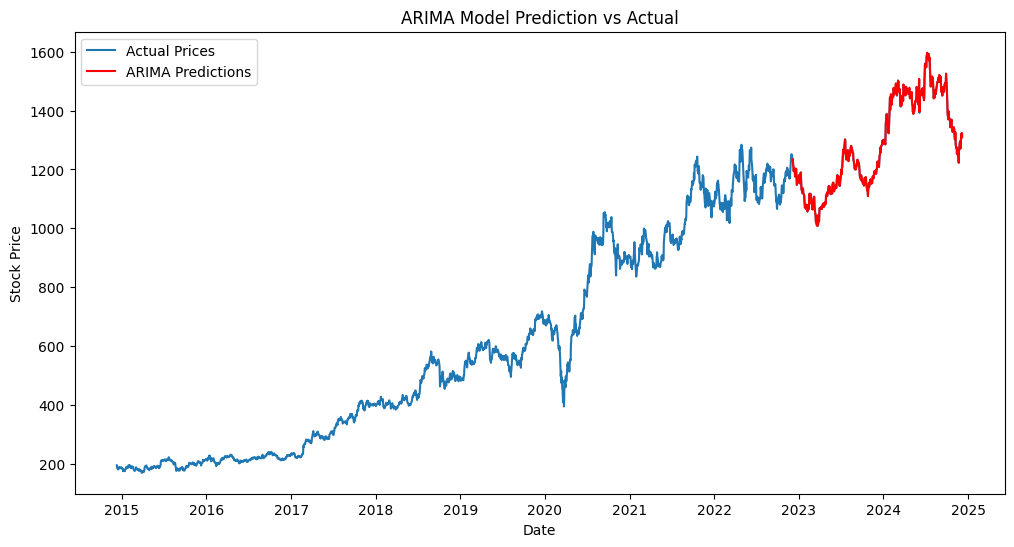

In [82]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Actual Prices')
plt.plot(test_data.index, _df['Predicted Value'], label='ARIMA Predictions', color='red')  # Use test_data.index and _df['Predicted Value']
plt.title('ARIMA Model Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [84]:
# Future predictions
future_steps = 100  # Predict for 30 days
future_dates = [data['Date'].iloc[-1] + timedelta(days=i) for i in range(1, future_steps + 1)]
future_forecast = auto_arima_model.predict(n_periods=future_steps) # Use auto_arima_model and .predict()

In [85]:
# Display future predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Close': future_forecast
})
print("Future Predictions:")
print(future_df)

Future Predictions:
           Date  Predicted Close
1972 2024-12-07      1228.222034
1973 2024-12-08      1229.982059
1974 2024-12-09      1232.357773
1975 2024-12-10      1232.017965
1976 2024-12-11      1230.632966
...         ...              ...
2067 2025-03-12      1279.856526
2068 2025-03-13      1280.329587
2069 2025-03-14      1280.638816
2070 2025-03-15      1281.176942
2071 2025-03-16      1281.909863

[100 rows x 2 columns]


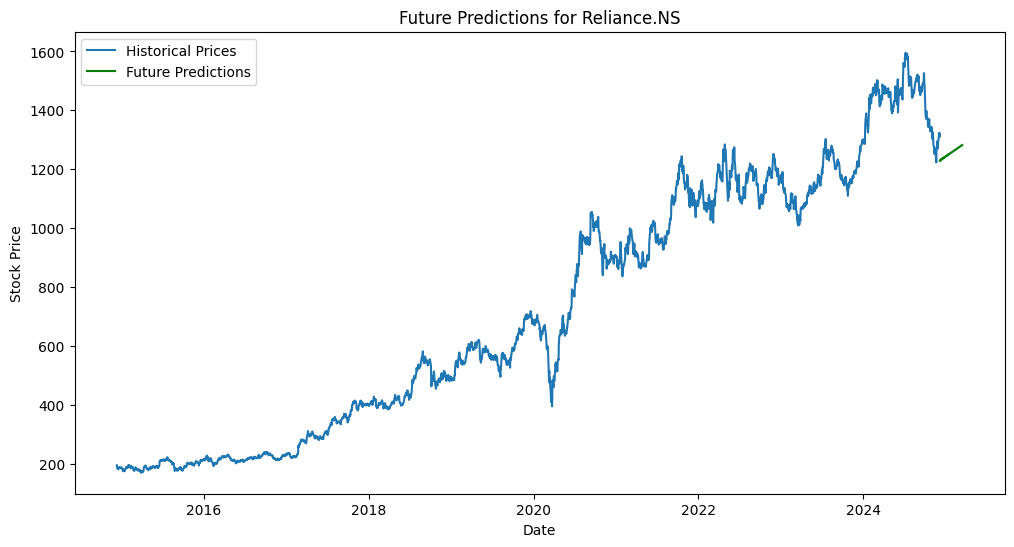

In [86]:
# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Historical Prices')
plt.plot(future_df['Date'], future_df['Predicted Close'], label='Future Predictions', color='green')
plt.title(f'Future Predictions for {tickerSymbol}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()